In [1]:
##Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [4]:
df = pd.read_csv(r"C:\Users\apeks\OneDrive\Desktop\master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.shape

(27820, 12)

In [6]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [9]:
### Dropping column with high missing value
df.drop('HDI for year', axis=1, inplace=True)

In [10]:
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [11]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [12]:
### Renaming columns for better understanding
df.rename(columns={"suicides/100k pop":"suicides_pop",
                  " gdp_for_year ($) ":"gdp_for_year"," gdp_per_capita ($) ":"gdp_per_capita",
                    "gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_pop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

## Data visualization

##### Var-Sex

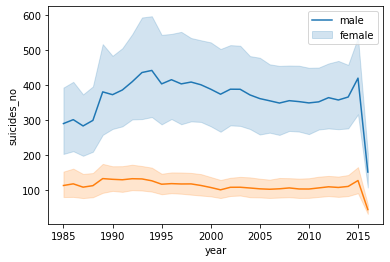

In [13]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no)
sns.lineplot(df_women.year, df.suicides_no)
plt.legend(["male", 'female'])
plt.show()

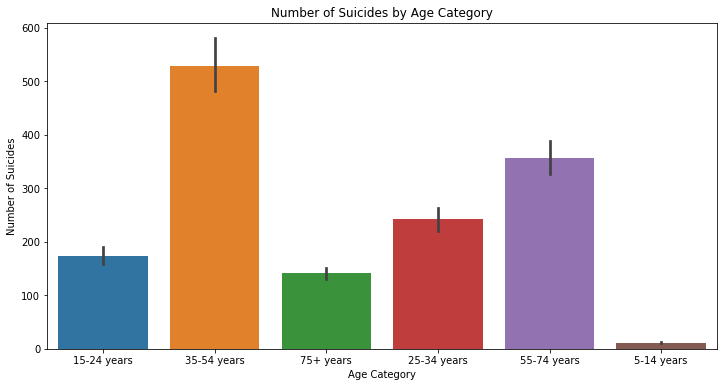

In [15]:
plt.figure(figsize=(12,6)) 
sns.barplot(x='age', y='suicides_no', data=df)
plt.xlabel('Age Category')
plt.ylabel('Number of Suicides')
plt.title('Number of Suicides by Age Category')
plt.show()

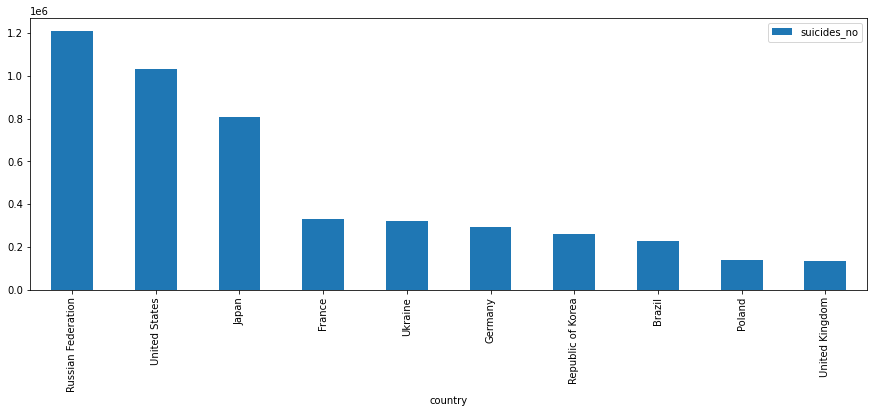

In [16]:
df.groupby(by=['country'])['suicides_no'].sum().reset_index().sort_values(['suicides_no'],
                    ascending=False).head(10).plot(x='country',y='suicides_no',kind='bar', figsize=(15,5))

plt.show()

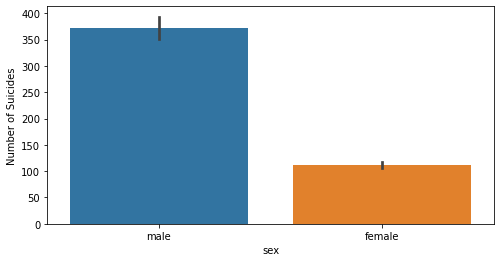

In [17]:
plt.figure(figsize=(8,4)) 
ax=sns.barplot(x='sex', y='suicides_no', data=df)
plt.xlabel('sex')
plt.ylabel('Number of Suicides')
plt.show()

More males commit suicide than females

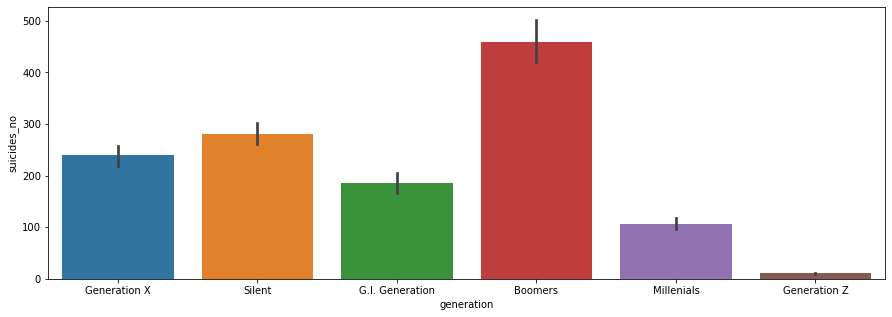

In [18]:
plt.figure(figsize=(15,5))

ax = sns.barplot(x='generation', y='suicides_no', data=df)

Suicide rates are higher among the boomer generation and lowest in the Generation Z.

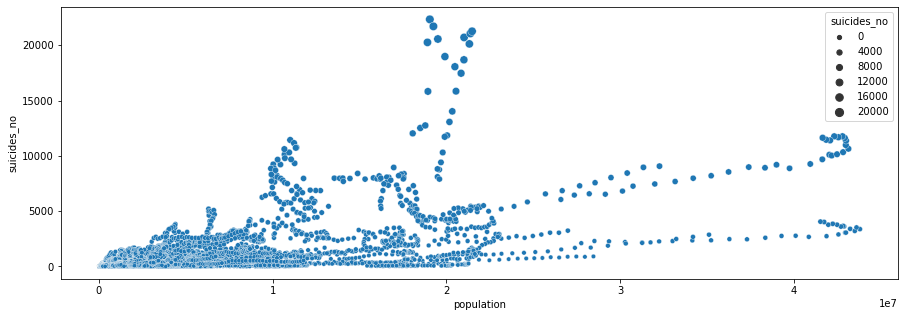

In [19]:
figure = plt.figure(figsize=(15,5))

ax = sns.scatterplot(x=df['population'],y='suicides_no', data=df, size = "suicides_no")

<AxesSubplot:xlabel='population', ylabel='suicides_no'>

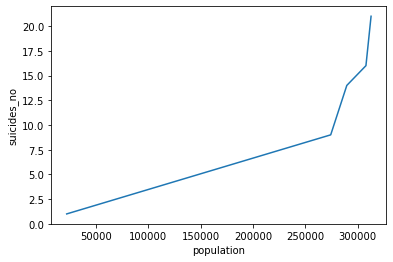

In [20]:
sns.lineplot(x='population',y='suicides_no', data=df.head())

In [22]:
df.head()

,country,year,sex,age,suicides_no,population,suicides_pop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


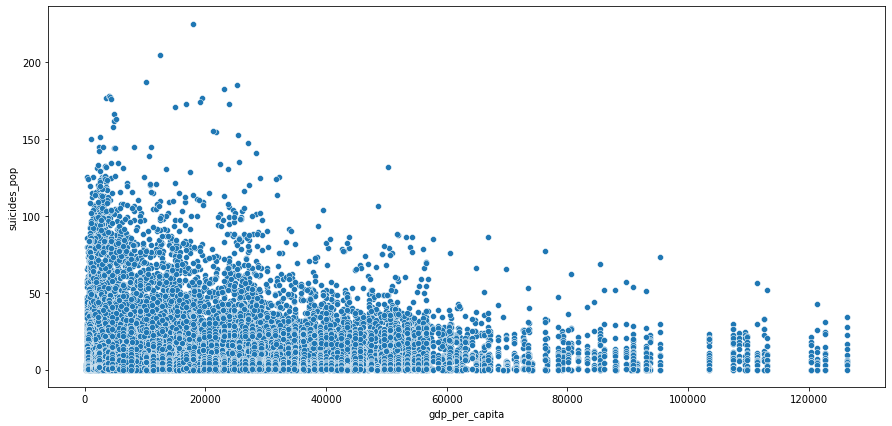

In [23]:
figure = plt.figure(figsize=(15,7))

sns.scatterplot(x='gdp_per_capita', y='suicides_pop', data=df) # scatter plot 
plt.show()


Higher suicide rates are a bit more prevalent in countries with lower GDP Per Capita.

## Corrrelation Analysis

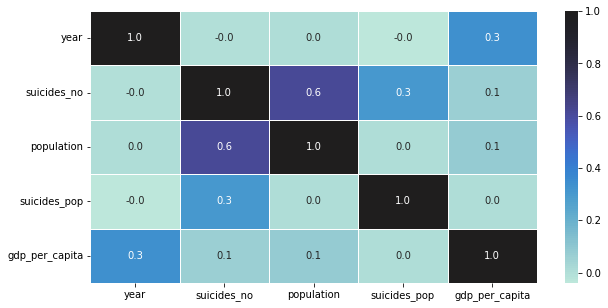

In [24]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )  # heatmap
plt.show()

In [25]:
df.corr()

,year,suicides_no,population,suicides_pop,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides_pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,1.000000


population- suicides_no is the only pair with the high correlation.



## pattern analysis using trend plot

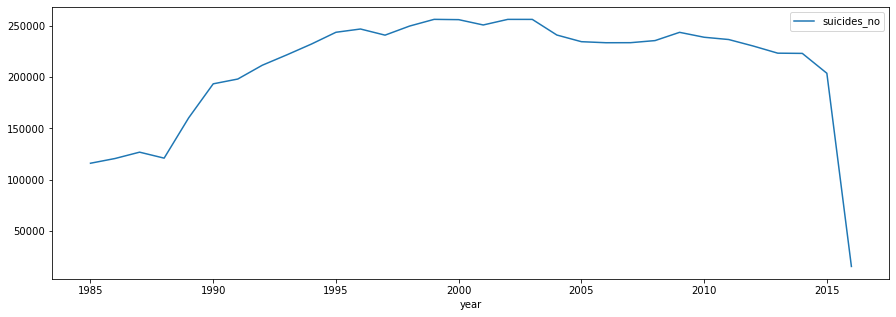

In [26]:
df[['year','suicides_no']].groupby(['year']).sum().plot(figsize=(15,5))

plt.show()